In [ ]:
from skimage import io
import numpy as np
import os
import scanpy as sc
import squidpy as sq
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import seaborn as sns
import os
import gzip
import numpy as np

plt.rcParams['figure.dpi'] = 150
plt.rcParams['font.family'] = ['serif']
plt.rcParams['font.size'] = 12
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['axes.titlesize'] = 12
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

In [ ]:
path_016 = "/data/kanferg/Sptial_Omics/playGround/Data/Visium_HD_Mouse_Brain_square_example/square_016um"
path_008 = "/data/kanferg/Sptial_Omics/playGround/Data/Visium_HD_Mouse_Brain_square_example/square_008um"
path_002 = "/data/kanferg/Sptial_Omics/playGround/Data/Visium_HD_Mouse_Brain_square_example/square_002um"
pathout = "/data/kanferg/Sptial_Omics/SpatialOmicsToolkit/out"

/gpfs/gsfs10/users/kanferg/conda/envs/squidpy/lib/python3.10/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/gpfs/gsfs10/users/kanferg/conda/envs/squidpy/lib/python3.10/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/gpfs/gsfs10/users/kanferg/conda/envs/squidpy/lib/python3.10/site-packages/scanpy/readwrite.py:476: DtypeWarning: Columns (1,2,3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  positions = pd.read_csv(
/gpfs/gsfs10/users/kanferg/conda/envs/squidpy/lib/python3.10/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/gpfs/gsfs10/users/kanferg/conda/envs/squidpy/li

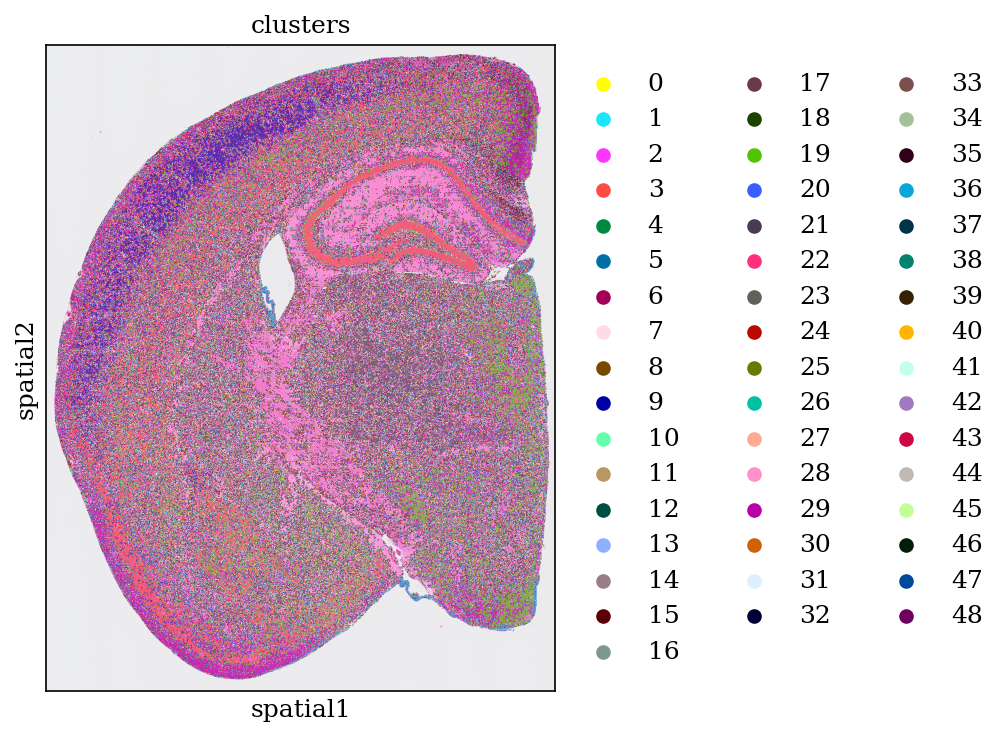

In [2]:
pathAdata = "/data/kanferg/Sptial_Omics/playGround/Data/Visium_HD_Mouse_Brain_square_example/square_008um"
adata = sc.read_visium(path=pathAdata)
sc.pp.filter_cells(adata, min_counts=50)
sc.pp.filter_cells(adata, min_genes=50)
sc.pp.filter_cells(adata, max_counts=1500)
sc.pp.normalize_total(adata)
sc.pp.log1p(adata)
sc.pp.pca(adata, n_comps=10)
sc.pp.neighbors(adata)
sc.tl.umap(adata)
sc.tl.leiden(adata, key_added="clusters", flavor="igraph", directed=False, n_iterations=2)
# Ensure the coordinates are a properly typed NumPy array
adata.obsm['spatial'] = np.array(adata.obsm['spatial'], dtype=np.float64)
# Plot
sq.pl.spatial_scatter(adata, color=["clusters"])

In [2]:
file_path = "/data/kanferg/Sptial_Omics/playGround/out/example_file.h5ad"
loaded_adata = sc.read_h5ad(file_path)

In [10]:
path = "/data/kanferg/Sptial_Omics/playGround/Data/Visium_HD_Mouse_Brain_square_example/square_008um/spatial"
file = "tissue_hires_image.png"
image = io.imread(os.path.join(path,file))
image_array = np.array(image)
print(f'{np.shape(image_array)}')

pathAdata =  "/data/kanferg/Sptial_Omics/playGround/Data/Visium_HD_Mouse_Brain_square_example/square_008um"
img = sq.im.ImageContainer(image_array, layer="img1")
adata = sc.read_visium(path = pathAdata)

(6000, 4729, 3)


/gpfs/gsfs10/users/kanferg/conda/envs/squidpy/lib/python3.10/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/gpfs/gsfs10/users/kanferg/conda/envs/squidpy/lib/python3.10/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/gpfs/gsfs10/users/kanferg/conda/envs/squidpy/lib/python3.10/site-packages/scanpy/readwrite.py:476: DtypeWarning: Columns (1,2,3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  positions = pd.read_csv(


In [11]:
adata

AnnData object with n_obs × n_vars = 393543 × 19059
    obs: 'in_tissue', 'array_row', 'array_col'
    var: 'gene_ids', 'feature_types', 'genome'
    uns: 'spatial'
    obsm: 'spatial'

In [12]:
sc.pp.filter_cells(adata, min_counts = 50)
sc.pp.filter_cells(adata, min_genes = 50)
sc.pp.filter_cells(adata, max_counts = 1500)
sc.pp.normalize_total(adata)
sc.pp.log1p(adata)
adata

/gpfs/gsfs10/users/kanferg/conda/envs/squidpy/lib/python3.10/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/gpfs/gsfs10/users/kanferg/conda/envs/squidpy/lib/python3.10/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


AnnData object with n_obs × n_vars = 357701 × 19059
    obs: 'in_tissue', 'array_row', 'array_col', 'n_counts', 'n_genes'
    var: 'gene_ids', 'feature_types', 'genome'
    uns: 'spatial', 'log1p'
    obsm: 'spatial'

In [13]:
sc.pp.pca(adata, n_comps = 10)
sc.pp.neighbors(adata)

In [14]:
adata

AnnData object with n_obs × n_vars = 357701 × 19059
    obs: 'in_tissue', 'array_row', 'array_col', 'n_counts', 'n_genes'
    var: 'gene_ids', 'feature_types', 'genome'
    uns: 'spatial', 'log1p', 'pca', 'neighbors'
    obsm: 'spatial', 'X_pca'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

In [15]:
sc.tl.umap(adata)
adata

AnnData object with n_obs × n_vars = 357701 × 19059
    obs: 'in_tissue', 'array_row', 'array_col', 'n_counts', 'n_genes'
    var: 'gene_ids', 'feature_types', 'genome'
    uns: 'spatial', 'log1p', 'pca', 'neighbors', 'umap'
    obsm: 'spatial', 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

In [16]:
sc.tl.leiden(adata, key_added="clusters", flavor="igraph", directed=False, n_iterations=2)
adata

AnnData object with n_obs × n_vars = 357701 × 19059
    obs: 'in_tissue', 'array_row', 'array_col', 'n_counts', 'n_genes', 'clusters'
    var: 'gene_ids', 'feature_types', 'genome'
    uns: 'spatial', 'log1p', 'pca', 'neighbors', 'umap', 'clusters'
    obsm: 'spatial', 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

In [22]:
adata.obsm['spatial'] = np.array(adata.obsm['spatial'], dtype=np.float64)
adata.obsm['spatial']

array([[11776.20047345,  8988.20042418],
       [12812.94919716, 17761.30141825],
       [17972.74391189, 15142.99743472],
       ...,
       [14139.92325096, 16660.95969078],
       [14698.51847194, 11046.1646284 ],
       [ 3438.95598236, 17698.52119235]])

/gpfs/gsfs10/users/kanferg/conda/envs/squidpy/lib/python3.10/site-packages/squidpy/pl/_spatial_utils.py:483: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = color_source_vector.map(color_map)


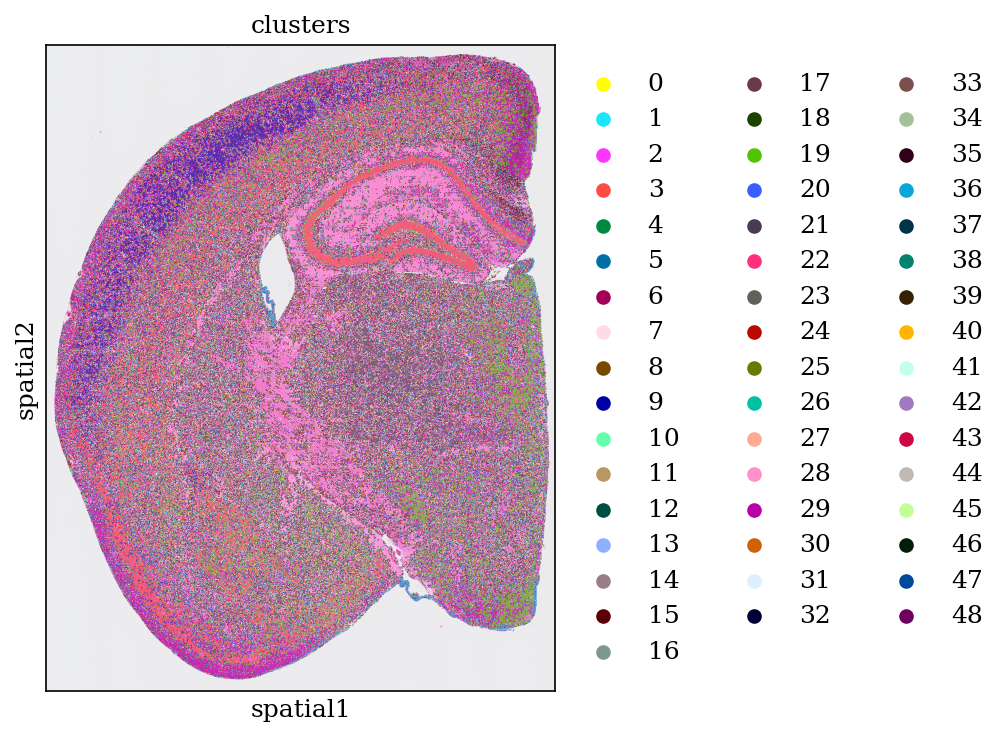

In [23]:
sq.pl.spatial_scatter(adata, color=["clusters"])

The issue with the `dtype=object` suggests that the coordinates array is not properly typed as a numeric array. To resolve this, we need to convert the array to a proper numeric type, such as `float`.

Here is the updated code to ensure the `spatial` key in `obsm` is properly typed:

```python
import squidpy as sq
import scanpy as sc
from skimage import io
import os
import numpy as np

path = "/data/kanferg/Sptial_Omics/playGround/Data/Visium_HD_Mouse_Brain_square_example/square_008um/spatial"
file = "tissue_hires_image.png"
image = io.imread(os.path.join(path, file))
image_array = np.array(image)
print(f'{np.shape(image_array)}')

pathAdata = "/data/kanferg/Sptial_Omics/playGround/Data/Visium_HD_Mouse_Brain_square_example/square_008um"
img = sq.im.ImageContainer(image_array, layer="img1")
adata = sc.read_visium(path=pathAdata)
sc.pp.filter_cells(adata, min_counts=50)
sc.pp.filter_cells(adata, min_genes=50)
sc.pp.filter_cells(adata, max_counts=1500)
sc.pp.normalize_total(adata)
sc.pp.log1p(adata)

sc.pp.pca(adata, n_comps=10)
sc.pp.neighbors(adata)
sc.tl.umap(adata)
sc.tl.leiden(adata, key_added="clusters", flavor="igraph", directed=False, n_iterations=2)

# Ensure the coordinates are a properly typed NumPy array
adata.obsm['spatial'] = np.array(adata.obsm['spatial'], dtype=np.float64)

# Plot
sq.pl.spatial_scatter(adata, color=["clusters"])
```

This conversion to `dtype=np.float64` should resolve the `TypeError` and allow the coordinates to be used correctly in the plotting function.

In [3]:
adata = sq.datasets.visium_hne_adata()

In [4]:
adata

AnnData object with n_obs × n_vars = 2688 × 18078
    obs: 'in_tissue', 'array_row', 'array_col', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'n_counts', 'leiden', 'cluster'
    var: 'gene_ids', 'feature_types', 'genome', 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm'
    uns: 'cluster_colors', 'hvg', 'leiden', 'leiden_colors', 'neighbors', 'pca', 'rank_genes_groups', 'spatial', 'umap'
    obsm: 'X_pca', 'X_umap', 'spatial'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

## class for handle squdipy data from vizum hd expiment:

In [6]:
path = "/data/kanferg/Sptial_Omics/playGround/Data/Visium_HD_Mouse_Brain_square_example/square_008um/spatial"
file = "tissue_hires_image.png"
image = io.imread(os.path.join(path,file))
image_array = np.array(image)
print(f'{np.shape(image_array)}')

pathAdata =  "/data/kanferg/Sptial_Omics/playGround/Data/Visium_HD_Mouse_Brain_square_example/square_008um"
img = sq.im.ImageContainer(image_array, layer="img1")
adata = sc.read_visium(path = pathAdata)

for scale in [1.0, 2.0]:
    feature_name = f"features_summary_scale{scale}"
    sq.im.calculate_image_features(
        adata,
        img.compute(),
        features="summary",
        key_added=feature_name,
        n_jobs=4,
        scale=scale,
    )


# # combine features in one dataframe
# adata.obsm["features"] = pd.concat(
#     [adata.obsm[f] for f in adata.obsm.keys() if "features_summary" in f],
#     axis="columns",)
# # make sure that we have no duplicated feature names in the combined table
# adata.obsm["features"].columns = ad.utils.make_index_unique(
#     adata.obsm["features"].columns)

(6000, 4729, 3)


/gpfs/gsfs10/users/kanferg/conda/envs/squidpy/lib/python3.10/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/gpfs/gsfs10/users/kanferg/conda/envs/squidpy/lib/python3.10/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/gpfs/gsfs10/users/kanferg/conda/envs/squidpy/lib/python3.10/site-packages/scanpy/readwrite.py:476: DtypeWarning: Columns (1,2,3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  positions = pd.read_csv(


  0%|          | 0/393543 [00:00<?, ?/s]

/gpfs/gsfs10/users/kanferg/conda/envs/squidpy/lib/python3.10/site-packages/xarray/core/utils.py:494: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  warnings.warn(
/gpfs/gsfs10/users/kanferg/conda/envs/squidpy/lib/python3.10/site-packages/xarray/core/utils.py:494: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  warnings.warn(
/gpfs/gsfs10/users/kanferg/conda/envs/squidpy/lib/python3.10/site-packages/xarray/core/utils.py:494: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To acc

ValueError: Expected `height` to be in interval `[0, 6000]`, found `8988`.

In [ ]:
def cluster_features(features: pd.DataFrame, like=None) -> pd.Series:
    """
    Calculate leiden clustering of features.

    Specify filter of features using `like`.
    """
    # filter features
    if like is not None:
        features = features.filter(like=like)
    # create temporary adata to calculate the clustering
    adata = ad.AnnData(features)
    # important - feature values are not scaled, so need to scale them before PCA
    sc.pp.scale(adata)
    # calculate leiden clustering
    sc.pp.pca(adata, n_comps=min(10, features.shape[1] - 1))
    sc.pp.neighbors(adata)
    sc.tl.leiden(adata)

    return adata.obs["leiden"]


# calculate feature clusters
adata.obs["features_cluster"] = cluster_features(adata.obsm["features"], like="summary")

# compare feature and gene clusters
sq.pl.spatial_scatter(adata, color=["features_cluster", "cluster"])